In this lecture, we continue to study basic visualization techniques in Python. The libraries 'matplotlib' and 'seaborn' are two of the most commonly used libraries for graphical displays. However, there are other libraries that come in handy for both fundamental graphing tasks or specialized/advanced applications of visualizations. 

One such prominent example is the 'pandas' library, which not only can handle routine data wrangling but also offers many convenient graphical tools for explorative data analysis. As you will see, a lot of the built-in methods in 'pandas' have already been highy integrated with other powerful libraries such as 'matplotlib' etc. Integration of 'pandas' with other libraries is the primary focus of this lecture. 

In [2]:
import numpy as np
import pandas as pd
import os

%matplotlib inline

In [3]:
path='C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\\Introduction to Data Science Using Python\\datasets'
os.chdir(path)

As an illustrative example, let's use some built-in datasets in the 'pandas' library. For now, we need two datasets. The first dataset we read in is going to be a time series data, so we use the argument 'index_col=0' to indicate that we use the first column (time series as our index of the data). The second dataset we read in is not going to be a time series data, so we omit the above argument in the function. The third dataset 'Salaries' is quite large, so we truncate it to keep only 100 records. 

Our first example involves creating a histogram for a column in the first dataset. As you will see, the hist() method associated with the first 'DataFrame' object actually is related to the 'matplolib' library:

In [6]:
df1 = pd.read_csv('DS1',index_col=0)
print(df1.head(5), '\n')
df2 = pd.read_csv('DS2')
print(df2.tail(5), '\n----------------')
df3 = pd.read_csv('Salaries.csv').head(n=100)
print(df3.head(5))

                   A         B         C         D
2000-01-01  1.339091 -0.163643 -0.646443  1.041233
2000-01-02 -0.774984  0.137034 -0.882716 -2.253382
2000-01-03 -0.921037 -0.482943 -0.417100  0.478638
2000-01-04 -1.738808 -0.072973  0.056517  0.015085
2000-01-05 -0.905980  1.778576  0.381918  0.291436 

          a         b         c         d
5  0.286043  0.593465  0.907307  0.637898
6  0.430436  0.166230  0.469383  0.497701
7  0.312296  0.502823  0.806609  0.850519
8  0.187765  0.997075  0.895955  0.530390
9  0.908162  0.232726  0.414138  0.432007 
----------------
   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF O

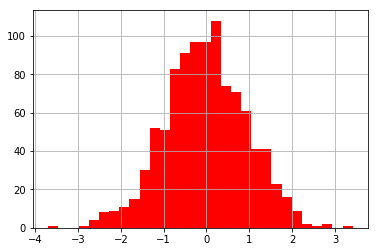

In [7]:
df1['A'].hist(bins=30, color='red')

As you see from the above example, the 'pandas' library is highly integrated with 'matplotlib' and other highly rated libraries. One can easily follow this line of thoughts and call other types of plots other than histogram using a similar technique. For example, one can use the plot() method to have more flexible plot types specified. In this fashion, we can plot not only histograms but also other types of graphs. 

Below, the first block of code gives us the same histogram as before, albeit using a different color. The second block of code gives us a time series line plot. The third set of codes gives us an area pot. The fourth set of codes offers us a scatterplot which requires both x and y axis to be numeric (this is usually used to see correlations and whether the two variables will have a specific statistical relationship). The fifth set of codes generates a box plot. The sixth block of codes generates a kernel density plot. 

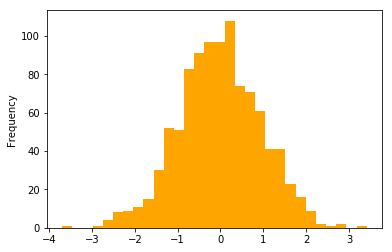

In [8]:
df1['A'].plot(kind='hist', color='orange', bins=30)

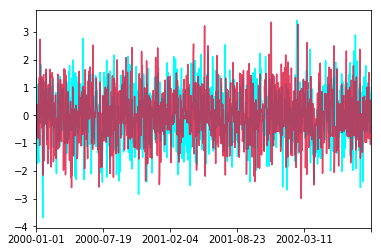

In [9]:
df1['A'].plot(kind='line', color='cyan')
df1['C'].plot(kind='line', color='crimson', alpha=0.8)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


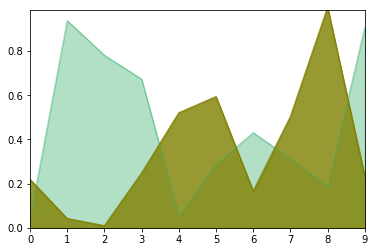

In [10]:
areaplot1=df2['a'].plot(kind='area', color='mediumseagreen', alpha=0.4)
areaplot2=df2['b'].plot(kind='area', color='olive', alpha=0.8)
print(areaplot1)
print(areaplot2)

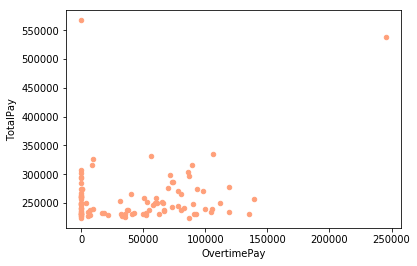

In [11]:
df3.plot(kind='scatter',x='OvertimePay', y='TotalPay', color='lightsalmon')

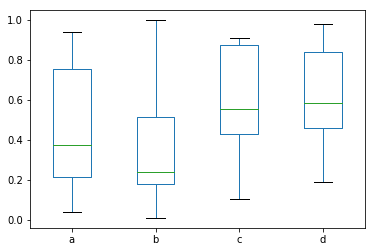

In [12]:
df2.plot.box() # this can also pass a by= argument for groupby

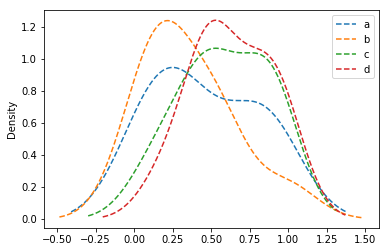

In [13]:
df2.plot.density(ls='--')

We have seen that the ability for 'pandas' to integrate with other types of libraries is an enormous help for data scientists who occasionally demand quick and dirty graphical displays. In the next section, we study the 'plotly' and 'cufflinks' libraries. The official documentation for 'plotly' is here: https://plot.ly/. This is actually a company that specializes providing services for modern data visualizations. The library 'plotly' allows you to create interactive plots that you can use in dashboards or websites (you can save them as html files or static images), whereas 'cufflinks' is used to integrate 'pandas' with 'plotly'. 

Now before we start, we first need to resolve the installation issue. Currently, Anaconda doesn't have these two libraries installed. So we need to use 'pip install' type of commands at the Anaconda prompt to install the pacakges. Now at the command prompt, type in the following commands:

    pip install plotly
    pip install cufflinks
    
One important note: make sure you only have one installation of Python on your computer when you do this, otherwise the installation may not work.

Now let's first check the version of the package:

In [14]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
print(__version__) 

2.2.3


Now we need to activate the interactive feature under the jupyter notebook environment. Essentially, 'plotly' just connects Python to an interactive Javascript library. This is achieved through the following command, which allows the jupyter notebook to access the interactive visualizations. 

In [12]:
init_notebook_mode(connected=True)

The last step of the setup would be to make sure that we can allow 'cufflinks' to be used offline. This is achieved through the following command:

In [13]:
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Notice that when you run the command above, you may encounter a warning saying 'IOPub data rate exceeded'. To bypass this, you basically need to increase the limit. This can be done at the Anaconda prompt level, see here for a quick solution:

    https://stackoverflow.com/questions/43288550/iopub-data-rate-exceeded-when-viewing-image-in-jupyter-notebook
    
Now we have finished the prepration setup work for 'plotly' and 'cufflinks'. To do so, let's first create some pseudo datasets:

In [14]:
df1 = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split()) # 100 rows and 4 columns
df2 = pd.DataFrame({'Category':['A','B','C'],'Values':[32,43,50]})
print(df1.head())
print(df2.head())

          A         B         C         D
0  0.465789 -0.123767 -0.015096 -0.246971
1 -0.246986 -0.514370  0.357200 -0.367686
2 -1.362087 -0.578393  0.700543  0.095746
3 -0.473924  0.572715 -0.384546  1.765487
4  0.783072  0.038151  0.000195  0.628626
  Category  Values
0        A      32
1        B      43
2        C      50


Using 'cufflinks' and iplot(), we can create the following types of plots as examples:

* scatter
* bar
* box
* spread
* ratio
* heatmap
* surface
* histogram
* bubble

The big difference between the plot() function in the 'matplotlib' library vs. the iplot() function in the 'plotly' package is that the latter allows for interactive features on the plot. Below let's create a scatterplot:

In [15]:
df1.iplot(kind='scatter',x='A',y='B',mode='markers',size=6)

The above gives an iplot() example. Notice that this picture is very interactive as you can hover your mouse on the graphics and see individual points. On the upper ribbon of the graphical display, there are other functionalities included (just like using a Microsoft Office product), such as zooming in/out, saving the picture, panning and downloading etc. The statement mode='marker' indicates that we are plotting scatter dots on the plot (otherwise it would be connected lines). 

Now let's look at bar plots and box plots. Bar plots are very useful if you combine it with aggregation functions. In contrast, box plots can help us see the quartiles and the interquartile range:

In [16]:
df2.iplot(kind='bar',x='Category',y='Values', size=5)

In [17]:
df1.sum().iplot(kind='bar', size=5)

In [18]:
df1.iplot(kind='box', size=2)

Now let's take a look at the 3D surface plot. To do so we need to create a new 'DataFrame' object first. The 3D plot can be rotated and examined from different angles:

In [19]:
df3 = pd.DataFrame({'x':[1,2,3,4,5],'y':[10,20,30,20,10],'z':[5,4,3,2,1]})
print(df3)
df3.iplot(kind='surface',colorscale='rdylbu')

   x   y  z
0  1  10  5
1  2  20  4
2  3  30  3
3  4  20  2
4  5  10  1


Histograms can be generated with ease. We usually create histograms based on one column of the dataset. But you can also call the whole dataset and the resulting histogram will be overlayed on top of each other together. You can turn each of these columns on or off by clicking on the legends interactively.  

In [20]:
df1['A'].iplot(kind='hist',bins=30)

In [21]:
df1.iplot(kind='hist',bins=30)

Spread plots are often used for time series analysis and financial analysis (often used in stock analysis):

In [22]:
df1[['A','B']].iplot(kind='spread')

A bubble plot is exactly the same as a scatter plot except for the fact that it will change size of the points based on another variable:

In [23]:
df1.iplot(kind='bubble',x='A',y='B',size='C')

Lastly, scatter_matrix() is very similar to the pairplot() method in the 'seaborn' package. This is very useful for small dataset. Very big data could crash this function.  

In [24]:
df1.scatter_matrix()